In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [55]:
# load df
who_measures = pd.read_csv('input/Archive/measures/dataset_1/dataset_1_30Hz_ennjpdaf_WHO.csv')
who_measures.head()

,track_id,vcl,vsl,vap_mean,vap_std,alh_mean,alh_std,lin,wob,stra,bcf_mean,bcf_std,mad
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,6.746085,1.669987,4.505772,12.498562,1.899712,1.622582,0.247549,0.667909,0.370633,0.738636,0.439378,2.623755
2,2,6.586542,3.207075,3.655710,5.579378,2.206809,3.193406,0.486913,0.555027,0.877278,0.845361,0.361560,1.335038
3,3,8.372067,1.144585,4.367589,73.657785,2.710983,2.502473,0.136715,0.521686,0.262063,0.603774,0.489113,1.764570
4,4,6.941007,1.247587,4.256971,9.530973,2.517227,1.229993,0.179741,0.613307,0.293069,0.782609,0.412471,1.845644


In [56]:
# remove id col
measures = who_measures.drop('track_id', axis=1)
measures.head()

,vcl,vsl,vap_mean,vap_std,alh_mean,alh_std,lin,wob,stra,bcf_mean,bcf_std,mad
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,6.746085,1.669987,4.505772,12.498562,1.899712,1.622582,0.247549,0.667909,0.370633,0.738636,0.439378,2.623755
2,6.586542,3.207075,3.655710,5.579378,2.206809,3.193406,0.486913,0.555027,0.877278,0.845361,0.361560,1.335038
3,8.372067,1.144585,4.367589,73.657785,2.710983,2.502473,0.136715,0.521686,0.262063,0.603774,0.489113,1.764570
4,6.941007,1.247587,4.256971,9.530973,2.517227,1.229993,0.179741,0.613307,0.293069,0.782609,0.412471,1.845644


In [57]:
# normalize
scaler = StandardScaler()
measures_scaled = scaler.fit_transform(measures)

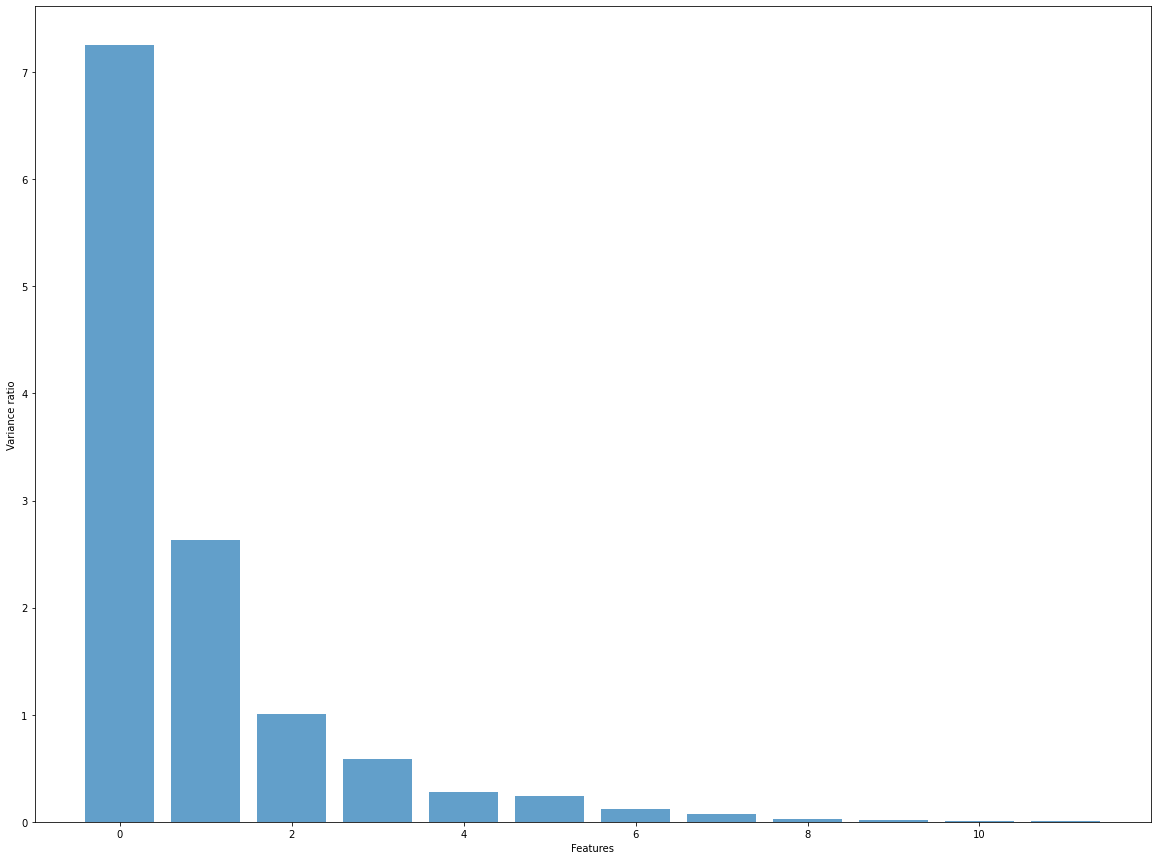

In [58]:
# features variance
pca = PCA()
measures_scaled = pca.fit_transform(measures_scaled)
pca_variance = pca.explained_variance_

plt.figure(figsize=(20, 15))
plt.bar(range(len(pca_variance)), pca_variance, alpha=0.7)
plt.ylabel('Variance ratio')
plt.xlabel('Features')
plt.show()

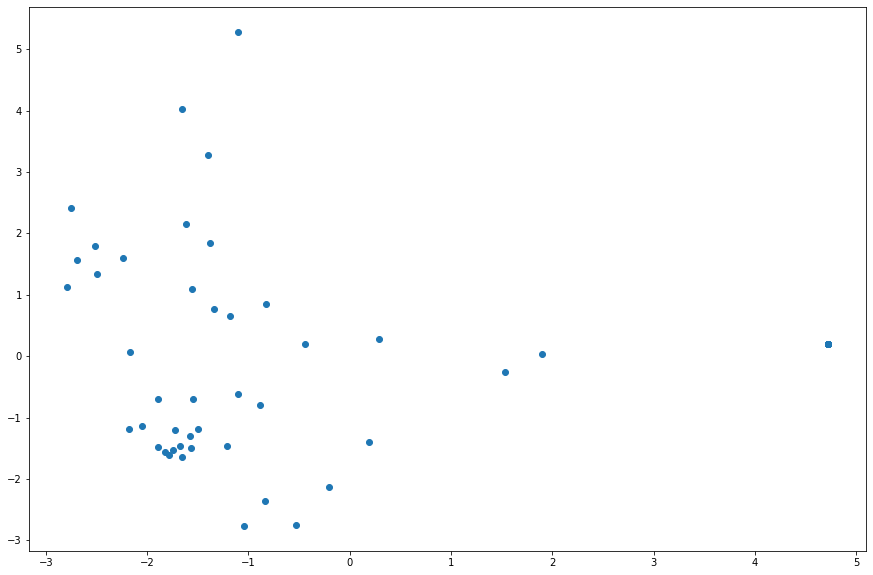

In [59]:
pca2 = PCA(n_components=12)
pca2.fit(measures_scaled)
x_3d = pca2.transform(measures_scaled)

plt.figure(figsize=(15, 10))
plt.scatter(x_3d[:, 0], x_3d[:, 1])
plt.show()

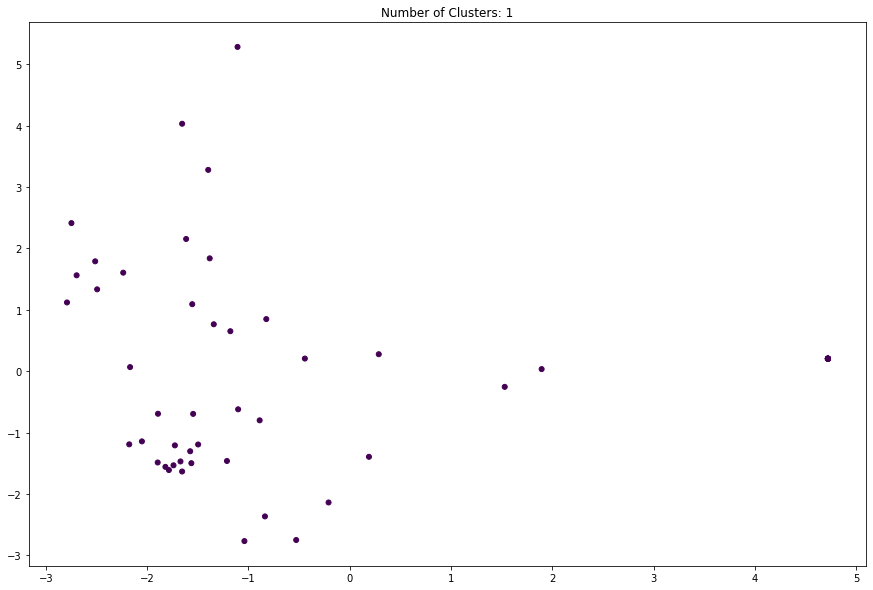

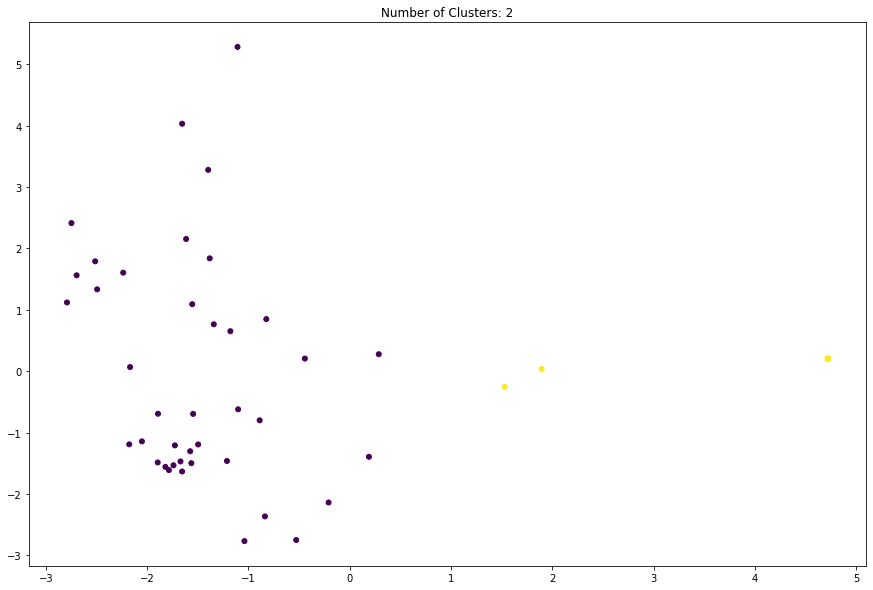

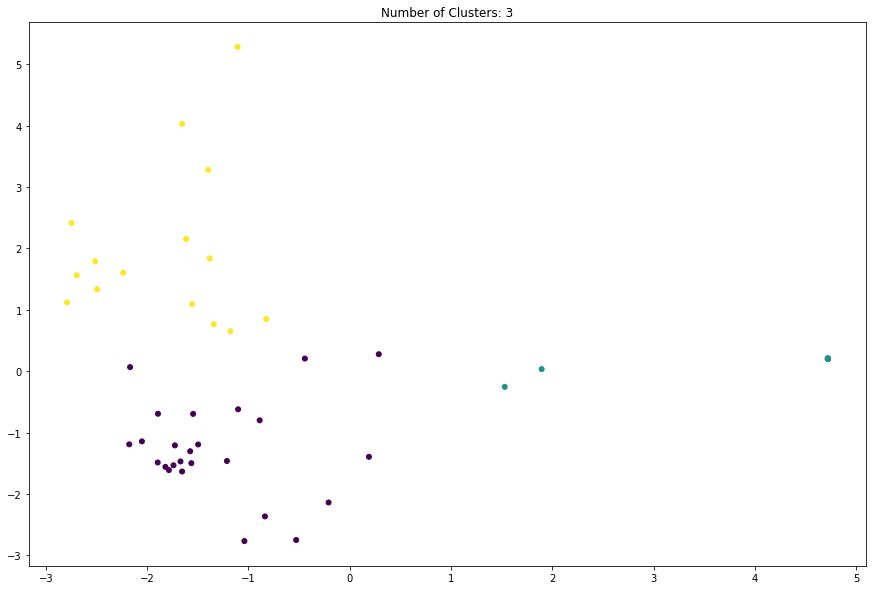

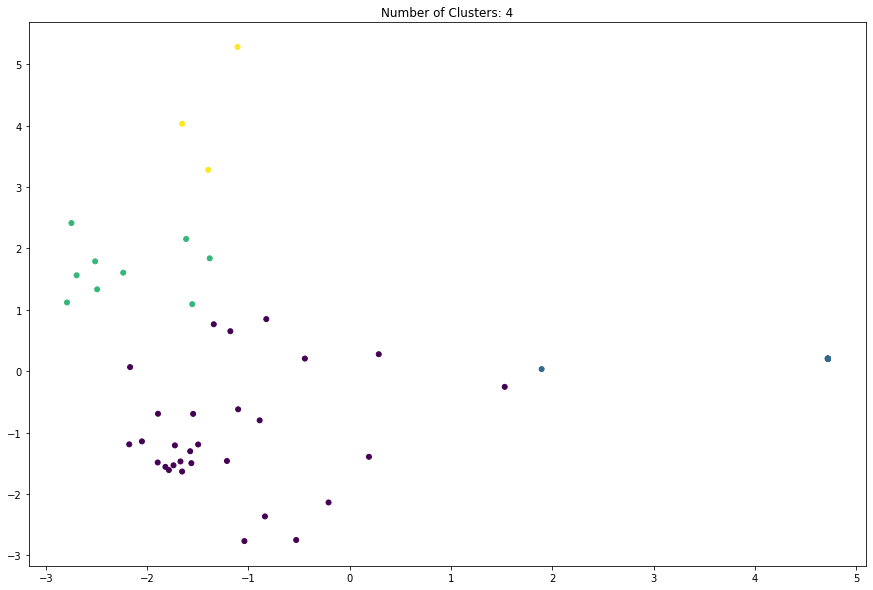

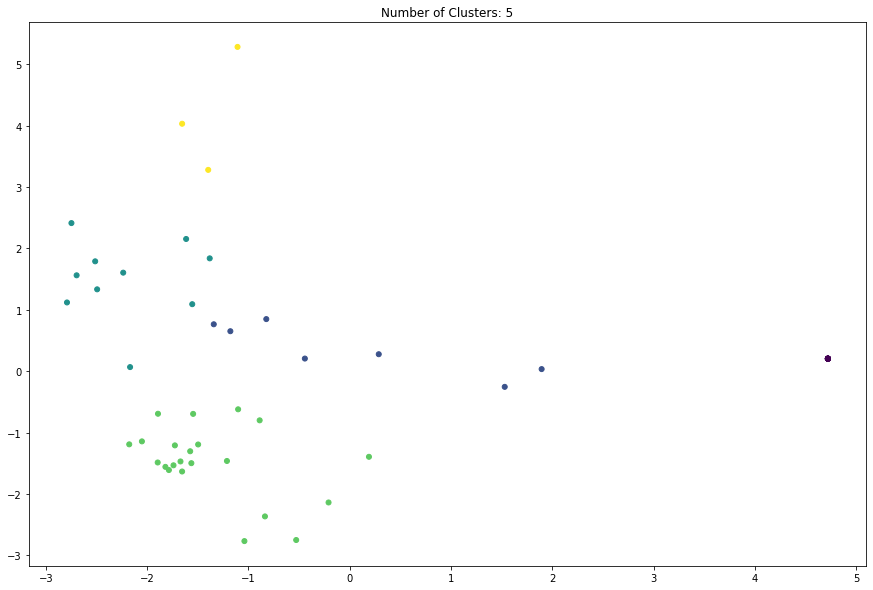

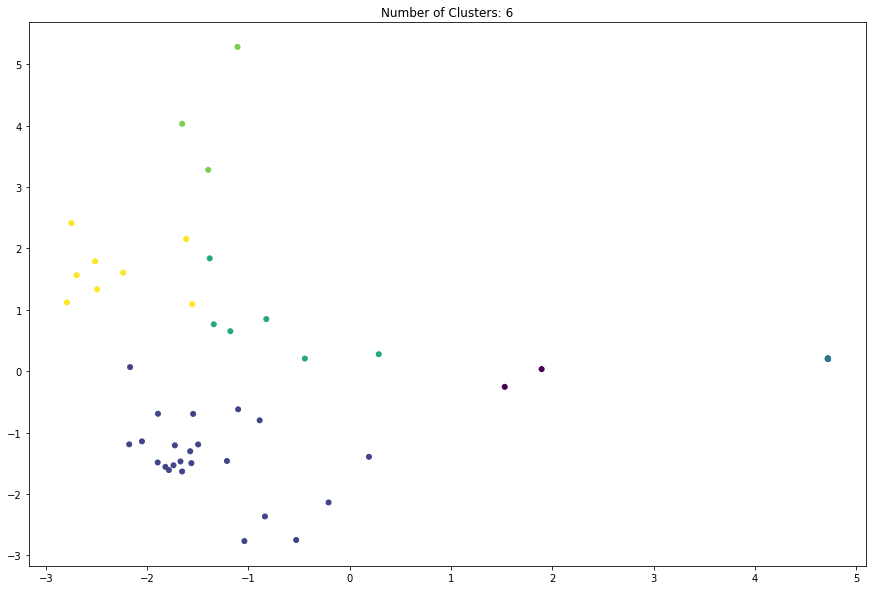

In [63]:
for i in range(1, 7):
    plt.figure(figsize=(15, 10))
    y_pred = KMeans(n_clusters=i).fit_predict(measures_scaled)
    plt.scatter(measures_scaled[:, 0], measures_scaled[:, 1], c=y_pred, s=25)
    plt.title(f"Number of Clusters: {i}")
plt.show();